In [ ]:
# Final Analysis

# 1 - Capomulin and Ramicane seemed to be the most effective, as they had the lowest mean tumor volume
# 2 - The distribution of sex was about equal (51% to 49%)
# 3 - There is a strong, positive correlation between average tumor volume and weight for Capomulin (0.842)



In [2]:
# Dependencies/Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study files
mouse_metadata_path = "Desktop/Mouse_metadata.csv"
study_results_path = "Desktop/Study_results.csv"

# Read mouse data and study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine data into single data frame
combined_data= pd.merge (study_results, mouse_metadata, how ='inner', on = "Mouse ID")

# Display data table
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice.
combined_data_df["Mouse ID"].nunique()

249

In [4]:
# Duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = combined_data_df.loc[combined_data_df.duplicated(["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_ID

# Data for the duplicate mouse ID
duplicate_ID_data= combined_data_df.loc[combined_data_df["Mouse ID"]=='g989']
duplicate_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Clean dataframe without duplicate mouse
clean_df = combined_data_df.loc[combined_data_df['Mouse ID'] != 'g989']
clean_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [8]:
# Number of mice in clean dataframe
clean_df["Mouse ID"].nunique()

248

In [14]:
# Summary statistics table using groupby method
drug_regimen = clean_df.groupby(["Drug Regimen"])

# Mean tumor volume
tumor_mean = drug_regimen["Tumor Volume (mm3)"].mean()

# Median tumor volume
tumor_median = drug_regimen["Tumor Volume (mm3)"].median()

# Variance of the tumor volume
tumor_variance = drug_regimen["Tumor Volume (mm3)"].var()

# Standard deviation of the tumor volume
tumor_std_dev = drug_regimen["Tumor Volume (mm3)"].std()

# SEM of the tumor volume
tumor_sem = drug_regimen["Tumor Volume (mm3)"].sem()

# Summary table
summary_df = pd.DataFrame({"Mean Tumor Volume":tumor_mean,"Median Tumor Volume":tumor_median,"Tumor Volume Variance": tumor_variance, "Tumor Volume Std. Dev.": tumor_std_dev, "Tumor Volume Std. Err.": tumor_sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Agg method
summary_stats_table = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_stats_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

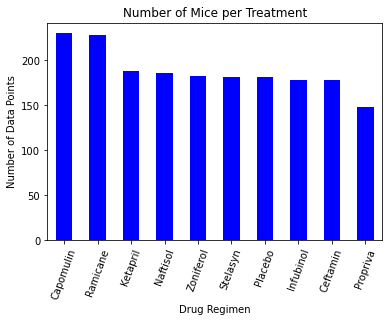

In [18]:
# Bar plot using pandas
total = clean_df["Drug Regimen"].value_counts()
# Total
total.plot.bar(rot = 70, color = "blue")
plt.title ('Number of Mice per Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()

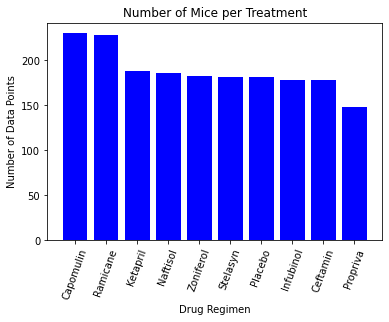

In [19]:
# Bar plot using pyplot
total = clean_df["Drug Regimen"].value_counts()
# total
x_axis = total.index
y_axis = total.values
plt.bar(x_axis,y_axis, color = 'b')
plt.xticks(rotation = 70)
plt.title ('Number of Mice per Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()

<AxesSubplot:ylabel='Sex'>

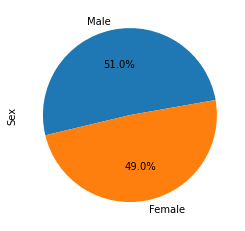

In [24]:
# Pie plot using pandas
dist_mf = clean_df["Sex"].value_counts()
# dist_mf.values
dist_mf.plot.pie(y = dist_mf.values, autopct ='%1.1f%%', startangle = 10)

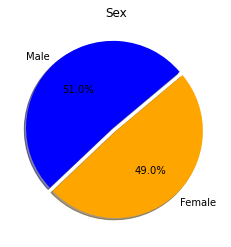

In [27]:
# Pie plot using pyplot
dist_mf = clean_df["Sex"].value_counts()
labels = dist_mf.index 
sizes = dist_mf.values
colors = ["blue", "orange"]
explode = (0.05,0)
plt.title('Sex')
plt.pie(sizes, explode = explode,labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 40)
plt.show()

In [28]:
# Last timepoint for each mouse
greatest = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe
merge_df = clean_df.merge(greatest,on=["Mouse ID","Timepoint"],how="inner")
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [29]:
# Put treatments into a list for for loop
# Create empty list to fill with tumor vol data
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset     
    # Determine outliers using upper and lower bounds

treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
tumor_data =[]
    
for name in treatments:
    final_vol = merge_df.loc[merge_df["Drug Regimen"]== name, "Tumor Volume (mm3)"]                  
    tumor_data.append(final_vol)
    
    quartiles = final_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_vol.loc[(final_vol < lower_bound) | (final_vol > upper_bound)]
    print(f"The {name}'s potential outliers: {outliers}") 

The Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
The Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
The Infubinol's potential outliers: 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
The Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


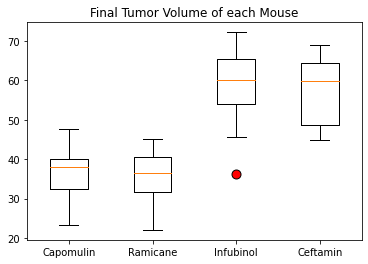

In [31]:
# Box plot of the final tumor volume of each mouse
plt.boxplot(tumor_data,labels=treatments,flierprops={'markerfacecolor':'red','markersize':9})
plt.title ('Final Tumor Volume of each Mouse')
plt.show()

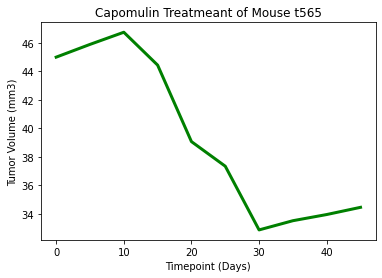

In [36]:
# Line plot of time point versus tumor volume for a mouse treated with Capomulin
line_plot_df = clean_df.loc[clean_df["Mouse ID"] == "t565"]
line_plot_df.head()

x_axis_tp = line_plot_df["Timepoint"]
tum_vol = line_plot_df["Tumor Volume (mm3)"]

plt.plot(x_axis_tp, tum_vol, color = 'green', linewidth = 3)
plt.title('Capomulin Treatmeant of Mouse t565')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

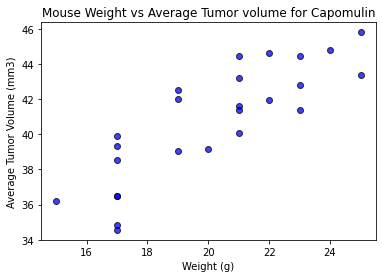

In [48]:
# Scatter plot of mouse weight versus average tumor volume for Capomulin regimen

cap_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin'] 

cap_avg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'], facecolors = "blue", edgecolors ="black", alpha = 0.75)
plt.title ('Mouse Weight vs Average Tumor volume for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and average tumor volume is 0.842


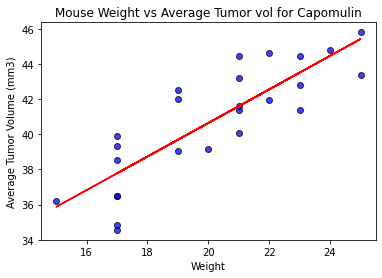

In [47]:
# Correlation coefficient and linear regression model for mouse weight and average tumor volume (Capomulin)
correlation = st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],3)}")

#Linear regression model
x_values = cap_avg['Weight (g)']
y_values = cap_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values,facecolors = "blue", edgecolors ="black", alpha = 0.75)
plt.plot(x_values,regress_values,"r-")
plt.title ('Mouse Weight vs Average Tumor vol for Capomulin')
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()